## Gender Based Violence - Tweet classification challenge 

This challenge aims to classify tweets about GBV without using keywords.

Are you able to develop a machine learning model that can classify a tweet about gender-based violence into either of the five categories:
- Sexual violence
- Emotional violence
- Economic violence
- Physical violence
- Harmful traditional practice


### Install modules/package

In [1]:
!pip install -U nltk #natural language toolkit

You should consider upgrading via the '/Users/michaelmbugua/Desktop/Zindi/gbv/venv/bin/python -m pip install --upgrade pip' command.


### import libraries/modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### load the dataset

In [3]:
train = pd.read_csv("Train.csv")

In [4]:
train.head()

,Tweet_ID,tweet,type
0,ID_PEHUUQ78,"Well, being the COMPLETE parasite that he is.....",sexual_violence
1,ID_9Q6MDMHE,I can't express how sad it makes me that there...,sexual_violence
2,ID_EXCD50LB,"Dom raped the girl, David enabled it. By provi...",sexual_violence
3,ID_11MA23BO,One prosecutor Magistrates courts at the Teddy...,sexual_violence
4,ID_NHLRFWH4,Then she told me 2 drinks in she was barred ou...,sexual_violence


In [5]:
test = pd.read_csv("Test.csv")

In [6]:
test.head()

,Tweet_ID,tweet
0,ID_D9ONL553,What is now left for us as Nigerians? In the s...
1,ID_263YTILY,She insulted me.... in public!
2,ID_62VS6IXC,"When I was 20, a man choked me in public after..."
3,ID_OG50429Q,I was leaving my husband &amp; he forced me to...
4,ID_VNQO3TJG,"”I care about you, want you part of my life,” ..."


### EDA

In [7]:
train.shape # the training dataset has 39650 rows

(39650, 3)

In [8]:
train["type"].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'economic_violence', 'Harmful_Traditional_practice'], dtype=object)

/Users/michaelmbugua/Desktop/Zindi/gbv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

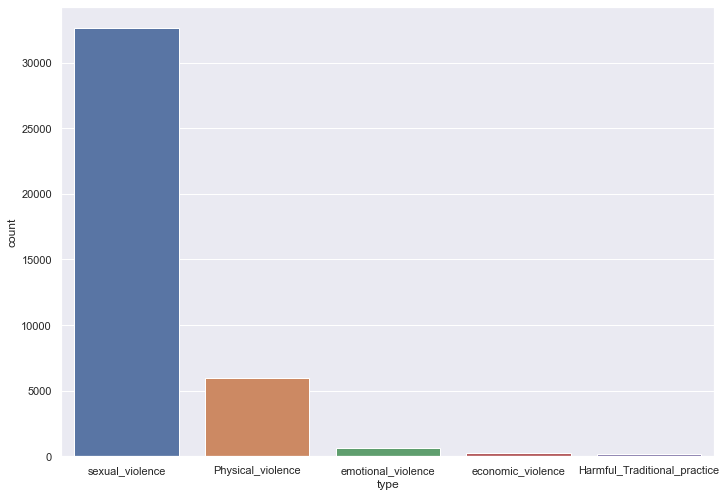

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(train["type"])

This dataset is highly imbalanced; from the graphs above, sexual violence is about 80%+. 

In [10]:
test.shape # the test dataset has 15581 rows

(15581, 2)

### Create models

Before we develop our models, we can set aside some validation dataset for inference purposes. We'll use scikit learn train test split module.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
X = train.drop(["type"], axis=1)
y = train["type"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CountVectorizer -converts text files/data into numerical feature vectors. You can find more information on CountVectorizer  here  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
vectorizer = CountVectorizer()

# fit_transform our tweets values to numerical vectors
x_train_counts = vectorizer.fit_transform(X_train["tweet"])
x_train_counts

<26565x30372 sparse matrix of type '<class 'numpy.int64'>'
	with 826204 stored elements in Compressed Sparse Row format>

In [14]:
print(vectorizer.get_feature_names())

['00', '000', '00006', '0005', '000th', '0093', '00am', '01', '010413', '02', '026', '03', '04', '05', '06', '07780', '08', '08146229938', '09', '09091177639', '0this', '10', '100', '1000', '10000', '1000s', '1000x', '100cedis', '100k', '100lbs', '100level', '100m', '100metres', '100s', '100thieves', '100x', '100yrs', '101', '1012', '102', '103', '1031', '103730280384th', '104', '105', '10am', '10days', '10derlove', '10k', '10m', '10million', '10mins', '10mo', '10month', '10s', '10th', '10x', '10years', '10yo', '10yr', '10yrs', '11', '110', '1100', '111', '1130pm', '116', '11f', '11i', '11pm', '11th', '11year', '11yo', '11yr', '11yrs', '12', '120', '1200', '1207', '12137', '122', '123', '1240', '1241', '1247', '125', '126', '1260', '1264', '127', '1271', '1274', '1276', '1277', '1279', '1293', '1296', '1299', '12a', '12am', '12hrs', '12m', '12mth', '12mths', '12th', '12y', '12year', '12yo', '12yr', '12yrs', '13', '130', '130k', '1312', '1318', '132', '13f', '13rw', '13y', '13year', '13

Using the CountVectorizer is effective, but this might give more preference to longer tweets than others. Let's try using frequencies. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [15]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(26565, 30372)

Multiple algorithms are used for text classification; let’s look at:-

### 1. Naive Bayes MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [16]:
# train.type.values our y values
clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB())])
clf = clf.fit(X_train["tweet"], y_train)

### evaluation metric
The evaluation metric on the Zindi leaderboard is accuracy; let’s test our simple model,

In [17]:
predicted = clf.predict(X_test.tweet)

In [18]:
predicted

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'Physical_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [19]:
np.unique(predicted)

array(['Physical_violence', 'emotional_violence', 'sexual_violence'],
      dtype='<U28')

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.8875047764615972

- Our simple model gave us an accuracy score of 88%, fair enough, but you should also be careful that the data is highly imbalanced, as discussed earlier. 

- Question? Is the imbalance percentage the same as in the test? Can you think of various ways to deal with the imbalance dataset

- We can also see the only 3 categories(i.e 'Physical_violence', 'emotional_violence', 'sexual_violence') were predicted yet we have 5 categories. Therefore 88% might not be that good.


### submission

In [21]:
sample_submission = pd.read_csv("Sample_submission.csv")

In [22]:
sample_submission.head()

,Tweet_ID,type
0,ID_D9ONL553,NaN
1,ID_263YTILY,NaN
2,ID_62VS6IXC,NaN
3,ID_OG50429Q,NaN
4,ID_VNQO3TJG,NaN


In [23]:
##let's prdict on the test data
test_predict = clf.predict(test.tweet)

In [24]:
test_predict

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'sexual_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [25]:
np.unique(test_predict)

array(['Physical_violence', 'sexual_violence'], dtype='<U28')

In [26]:
sample_submission["type"] = test_predict

In [27]:
sample_submission.to_csv('baseline_sub.csv', index=False)

### To do,
- Do more analysis
- Try working on ways to balance the dataset, undersampling, oversampling, using SMOTE, etc
- You can try other text classification models, e.g., using nltk, etc.
